In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
west = pd.read_csv("West.csv")

In [3]:
west.head()

,BPM,DBPM,OBPM,PER,VORP,WS,Year,Moved_to,West +/-
0,-78.1,-13.3,-65.2,-50.9,29.1,104.5,2018,West,24
1,-40.3,1.5,-41.8,-46.1,18.6,85.3,2017,West,42
2,-123.2,-31.8,-91.5,-151.8,12.1,104.8,2016,West,14
3,-117.4,-30.3,-87.5,-138.3,10.0,89.6,2015,West,76
4,-132.2,-51.8,-79.9,-130.4,11.8,95.8,2014,West,118


In [4]:
# PER, smallest R-squared under 0.2
X = west['PER']
y = west['West +/-']
X_c = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               West +/-   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     8.457
Date:                Thu, 22 Nov 2018   Prob (F-statistic):            0.00591
Time:                        11:51:55   Log-Likelihood:                -215.98
No. Observations:                  41   AIC:                             434.0
Df Residuals:                      40   BIC:                             435.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PER           -0.1684      0.058     -2.908      0.0

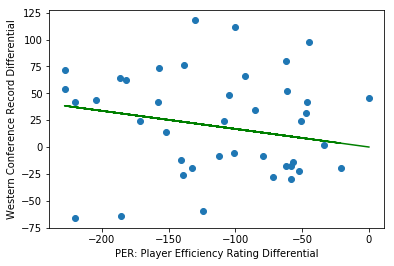

In [5]:
plt.scatter(X,y)
plt.plot(X, predictions, color = "g")
plt.xlabel("PER: Player Efficiency Rating Differential")
plt.ylabel("Western Conference Record Differential")
plt.show()

In [6]:
# PER with constant, Small Correlation, but big error, even lower R=squared
model = sm.OLS(y, X_c).fit()
predictions = model.predict(X_c)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               West +/-   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.2460
Date:                Thu, 22 Nov 2018   Prob (F-statistic):              0.623
Time:                        11:51:55   Log-Likelihood:                -215.43
No. Observations:                  41   AIC:                             434.9
Df Residuals:                      39   BIC:                             438.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.8549     15.465      1.025      0.3

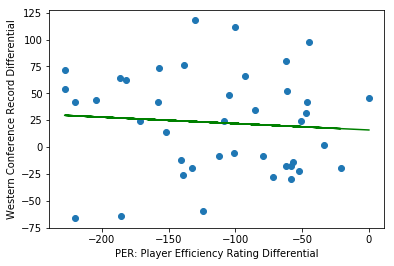

In [7]:
plt.scatter(X,y)
plt.plot(X, predictions, color = "g")
plt.xlabel("PER: Player Efficiency Rating Differential")
plt.ylabel("Western Conference Record Differential")
plt.show()

In [8]:
#VORP, Better than PER, R-squared = 0.223
X = west['VORP']
y = west['West +/-']
X_c = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               West +/-   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     11.46
Date:                Thu, 22 Nov 2018   Prob (F-statistic):            0.00160
Time:                        11:51:56   Log-Likelihood:                -214.74
No. Observations:                  41   AIC:                             431.5
Df Residuals:                      40   BIC:                             433.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
VORP           1.5680      0.463      3.386      0.0

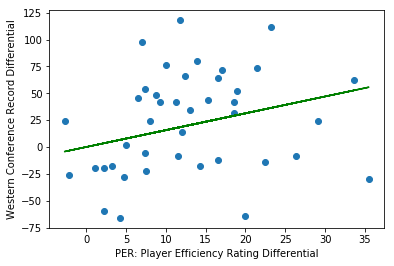

In [9]:
plt.scatter(X,y)
plt.plot(X, predictions, color = "g")
plt.xlabel("PER: Player Efficiency Rating Differential")
plt.ylabel("Western Conference Record Differential")
plt.show()

In [10]:
#VORP with constant, model hardly changed, worse overall
model = sm.OLS(y, X_c).fit()
predictions = model.predict(X_c)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               West +/-   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.983
Date:                Thu, 22 Nov 2018   Prob (F-statistic):              0.167
Time:                        11:53:37   Log-Likelihood:                -214.55
No. Observations:                  41   AIC:                             433.1
Df Residuals:                      39   BIC:                             436.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8553     12.731      0.617      0.5

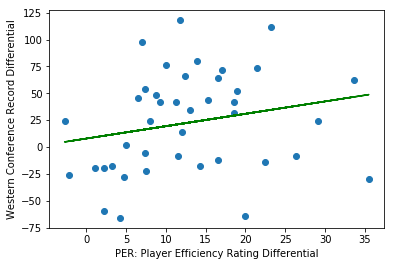

In [11]:
plt.scatter(X,y)
plt.plot(X, predictions, color = "g")
plt.xlabel("PER: Player Efficiency Rating Differential")
plt.ylabel("Western Conference Record Differential")
plt.show()

In [12]:
# BPM, Similar R-squared to VORP
X = west['BPM']
y = west['West +/-']
X_c = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               West +/-   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     11.15
Date:                Thu, 22 Nov 2018   Prob (F-statistic):            0.00183
Time:                        11:55:04   Log-Likelihood:                -214.87
No. Observations:                  41   AIC:                             431.7
Df Residuals:                      40   BIC:                             433.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BPM           -0.2139      0.064     -3.339      0.0

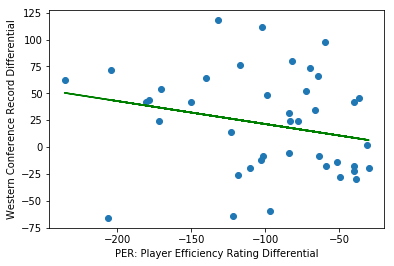

In [13]:
plt.scatter(X,y)
plt.plot(X, predictions, color = "g")
plt.xlabel("PER: Player Efficiency Rating Differential")
plt.ylabel("Western Conference Record Differential")
plt.show()

In [14]:
#BPM with constant, Smaller R-squared value, not much change on graph
model = sm.OLS(y, X_c).fit()
predictions = model.predict(X_c)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               West +/-   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.479
Date:                Thu, 22 Nov 2018   Prob (F-statistic):              0.231
Time:                        11:55:51   Log-Likelihood:                -214.80
No. Observations:                  41   AIC:                             433.6
Df Residuals:                      39   BIC:                             437.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7779     15.631      0.370      0.7

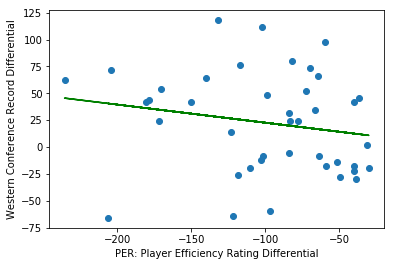

In [15]:
plt.scatter(X,y)
plt.plot(X, predictions, color = "g")
plt.xlabel("PER: Player Efficiency Rating Differential")
plt.ylabel("Western Conference Record Differential")
plt.show()

In [16]:
X = west['WS']
y = west['West +/-']
X_c = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               West +/-   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     13.77
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           0.000629
Time:                        11:56:59   Log-Likelihood:                -213.85
No. Observations:                  41   AIC:                             429.7
Df Residuals:                      40   BIC:                             431.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
WS             0.3098      0.083      3.711      0.0

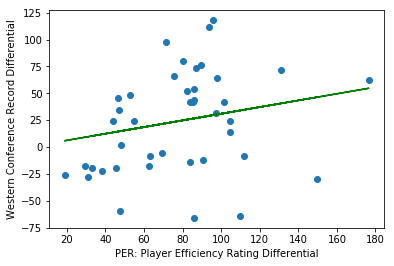

In [17]:
plt.scatter(X,y)
plt.plot(X, predictions, color = "g")
plt.xlabel("PER: Player Efficiency Rating Differential")
plt.ylabel("Western Conference Record Differential")
plt.show()

In [18]:
#WS with constant
model = sm.OLS(y, X_c).fit()
predictions = model.predict(X_c)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               West +/-   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     3.751
Date:                Thu, 22 Nov 2018   Prob (F-statistic):             0.0600
Time:                        11:59:39   Log-Likelihood:                -213.68
No. Observations:                  41   AIC:                             431.4
Df Residuals:                      39   BIC:                             434.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.4154     18.461     -0.564      0.5

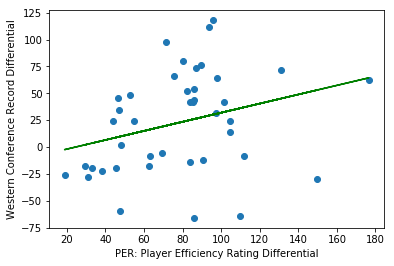

In [19]:
plt.scatter(X,y)
plt.plot(X, predictions, color = "g")
plt.xlabel("PER: Player Efficiency Rating Differential")
plt.ylabel("Western Conference Record Differential")
plt.show()

In [21]:
X = west[['WS', 'BPM']]
y = west['West +/-']
X_c = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               West +/-   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     6.730
Date:                Thu, 22 Nov 2018   Prob (F-statistic):            0.00308
Time:                        12:03:33   Log-Likelihood:                -213.83
No. Observations:                  41   AIC:                             431.7
Df Residuals:                      39   BIC:                             435.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
WS             0.2813      0.198      1.423      0.1

In [22]:
X = west[['WS', 'VORP']]
y = west['West +/-']
X_c = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               West +/-   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     6.714
Date:                Thu, 22 Nov 2018   Prob (F-statistic):            0.00312
Time:                        12:03:49   Log-Likelihood:                -213.84
No. Observations:                  41   AIC:                             431.7
Df Residuals:                      39   BIC:                             435.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
WS             0.3221      0.244      1.323      0.1

In [23]:
X = west[['VORP', 'BPM']]
y = west['West +/-']
X_c = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               West +/-   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     6.624
Date:                Thu, 22 Nov 2018   Prob (F-statistic):            0.00334
Time:                        12:04:00   Log-Likelihood:                -213.92
No. Observations:                  41   AIC:                             431.8
Df Residuals:                      39   BIC:                             435.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
VORP           0.9296      0.682      1.364      0.1

In [24]:
X = west[['WS', 'PER']]
y = west['West +/-']
X_c = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               West +/-   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     6.832
Date:                Thu, 22 Nov 2018   Prob (F-statistic):            0.00286
Time:                        12:04:10   Log-Likelihood:                -213.75
No. Observations:                  41   AIC:                             431.5
Df Residuals:                      39   BIC:                             434.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
WS             0.3758      0.178      2.115      0.0

In [25]:
X = west[['PER', 'BPM']]
y = west['West +/-']
X_c = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               West +/-   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     6.585
Date:                Thu, 22 Nov 2018   Prob (F-statistic):            0.00344
Time:                        12:04:22   Log-Likelihood:                -213.95
No. Observations:                  41   AIC:                             431.9
Df Residuals:                      39   BIC:                             435.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PER            0.3585      0.267      1.341      0.1

In [26]:
X = west[['PER', 'VORP']]
y = west['West +/-']
X_c = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               West +/-   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     6.021
Date:                Thu, 22 Nov 2018   Prob (F-statistic):            0.00526
Time:                        12:04:37   Log-Likelihood:                -214.39
No. Observations:                  41   AIC:                             432.8
Df Residuals:                      39   BIC:                             436.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PER           -0.0662      0.081     -0.820      0.4

In [36]:
X = west[['WS', 'BPM']]

lm = LinearRegression()

model = lm.fit(X, y)

predictions = lm.predict(X)

print("Linear regression score: %f" % lm.score(X, y))

print("Linear model coefficients: " + str(lm.coef_))

print("Linear model y intercept: %f" % lm.intercept_)

Linear regression score: 0.090576
Linear model coefficients: [ 0.38109861 -0.05373246]
Linear model y intercept: -12.455219


In [37]:
X = west[['WS', 'VORP']]

lm = LinearRegression()

model = lm.fit(X, y)

predictions = lm.predict(X)

print("Linear regression score: %f" % lm.score(X, y))

print("Linear model coefficients: " + str(lm.coef_))

print("Linear model y intercept: %f" % lm.intercept_)

Linear regression score: 0.089259
Linear model coefficients: [ 0.50272863 -0.35401341]
Linear model y intercept: -12.048326


In [38]:
X = west[['WS', 'PER']]

lm = LinearRegression()

model = lm.fit(X, y)

predictions = lm.predict(X)

print("Linear regression score: %f" % lm.score(X, y))

print("Linear model coefficients: " + str(lm.coef_))

print("Linear model y intercept: %f" % lm.intercept_)

Linear regression score: 0.089065
Linear model coefficients: [0.44503425 0.02964558]
Linear model y intercept: -8.743911


In [39]:
X = west[['VORP', 'BPM']]

lm = LinearRegression()

model = lm.fit(X, y)

predictions = lm.predict(X)

print("Linear regression score: %f" % lm.score(X, y))

print("Linear model coefficients: " + str(lm.coef_))

print("Linear model y intercept: %f" % lm.intercept_)

Linear regression score: 0.081304
Linear model coefficients: [ 1.110005   -0.16013107]
Linear model y intercept: -7.562254


In [40]:
X = west[['PER', 'BPM']]

lm = LinearRegression()

model = lm.fit(X, y)

predictions = lm.predict(X)

print("Linear regression score: %f" % lm.score(X, y))

print("Linear model coefficients: " + str(lm.coef_))

print("Linear model y intercept: %f" % lm.intercept_)

Linear regression score: 0.083209
Linear model coefficients: [ 0.3783311  -0.56658897]
Linear model y intercept: 8.631943


In [41]:
X = west[['PER', 'VORP']]

lm = LinearRegression()

model = lm.fit(X, y)

predictions = lm.predict(X)

print("Linear regression score: %f" % lm.score(X, y))

print("Linear model coefficients: " + str(lm.coef_))

print("Linear model y intercept: %f" % lm.intercept_)

Linear regression score: 0.055401
Linear model coefficients: [-0.0632989   1.16199733]
Linear model y intercept: 0.622566


In [42]:
X = west[['WS', 'BPM', 'VORP']]

lm = LinearRegression()

model = lm.fit(X, y)

predictions = lm.predict(X)

print("Linear regression score: %f" % lm.score(X, y))

print("Linear model coefficients: " + str(lm.coef_))

print("Linear model y intercept: %f" % lm.intercept_)

Linear regression score: 0.090579
Linear model coefficients: [ 0.38770712 -0.05191712 -0.02315526]
Linear model y intercept: -12.493111


In [43]:
X = west[['WS', 'BPM', 'PER']]

lm = LinearRegression()

model = lm.fit(X, y)

predictions = lm.predict(X)

print("Linear regression score: %f" % lm.score(X, y))

print("Linear model coefficients: " + str(lm.coef_))

print("Linear model y intercept: %f" % lm.intercept_)

Linear regression score: 0.123372
Linear model coefficients: [ 0.33286824 -0.40630771  0.32131679]
Linear model y intercept: -7.723739


In [44]:
X = west[['WS', 'VORP', 'PER']]

lm = LinearRegression()

model = lm.fit(X, y)

predictions = lm.predict(X)

print("Linear regression score: %f" % lm.score(X, y))

print("Linear model coefficients: " + str(lm.coef_))

print("Linear model y intercept: %f" % lm.intercept_)

Linear regression score: 0.095250
Linear model coefficients: [ 0.68667754 -0.91695362  0.08095976]
Linear model y intercept: -10.080367


In [45]:
X = west[['VORP', 'BPM', 'PER']]

lm = LinearRegression()

model = lm.fit(X, y)

predictions = lm.predict(X)

print("Linear regression score: %f" % lm.score(X, y))

print("Linear model coefficients: " + str(lm.coef_))

print("Linear model y intercept: %f" % lm.intercept_)

Linear regression score: 0.116600
Linear model coefficients: [ 0.96852586 -0.51090529  0.3323968 ]
Linear model y intercept: -3.354391


In [46]:
X = west[['WS', 'BPM', 'VORP', 'PER']]

lm = LinearRegression()

model = lm.fit(X, y)

predictions = lm.predict(X)

print("Linear regression score: %f" % lm.score(X, y))

print("Linear model coefficients: " + str(lm.coef_))

print("Linear model y intercept: %f" % lm.intercept_)

Linear regression score: 0.123372
Linear model coefficients: [ 0.3322475  -0.40648166  0.00217331  0.32132004]
Linear model y intercept: -7.720135


In [48]:
X = west.loc[:, "WS":"WS"]

lm = LinearRegression()

model = lm.fit(X, y)

predictions = lm.predict(X)

print("Linear regression score: %f" % lm.score(X, y))

print("Linear model coefficients: " + str(lm.coef_))

print("Linear model y intercept: %f" % lm.intercept_)

Linear regression score: 0.087750
Linear model coefficients: [0.42369582]
Linear model y intercept: -10.415371
